# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\prash\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\prash\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [65]:

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 50
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [66]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head(20)

,reviews
0,"Not Verified | Boarded on time, but it took a..."
1,"✅ Trip Verified | 5 days before the flight, w..."
2,Not Verified | \r\nWe traveled to Lisbon for ...
3,✅ Trip Verified | Booked a flight from Buchar...
4,✅ Trip Verified | Booked online months ago an...
5,✅ Trip Verified | The flight was on time. The...
6,"Not Verified | Angry, disappointed, and unsat..."
7,"✅ Trip Verified | As an infrequent flyer, Bri..."
8,"Not Verified | A totally unremarkable flight,..."
9,✅ Trip Verified | 1. Ground crew in Heathrow...


In [67]:
df.to_csv('BA_reviews.csv')

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [68]:
df = pd.read_csv('BA_reviews.csv')

We need to clean the reviews first before we can do any analysis. The most obvious cleaning part is removing the Trip verified part from each review

In [69]:
# Converting text to lowercase
df['reviews'] = df['reviews'].str.lower()
df.tail(5)

,Unnamed: 0,reviews
3694,3694,flew return in cw from lhr to bkk in august 20...
3695,3695,lhr to ham. purser addresses all club passenge...
3696,3696,my son who had worked for british airways urge...
3697,3697,london city-new york jfk via shannon on a318 b...
3698,3698,sin-lhr ba12 b747-436 first class. old aircraf...


In [70]:
# Removing punctuation and any other characters (non-alphanumeric characters)
import re
pattern = r'[^a-zA-Z0-9\s]'

df['reviews'] = df['reviews'].apply(lambda text: re.sub(pattern, '', text))

In [71]:
df

,Unnamed: 0,reviews
0,0,not verified boarded on time but it took age...
1,1,trip verified 5 days before the flight we w...
2,2,not verified \r\nwe traveled to lisbon for o...
3,3,trip verified booked a flight from buchares...
4,4,trip verified booked online months ago and ...
...,...,...
3694,3694,flew return in cw from lhr to bkk in august 20...
3695,3695,lhr to ham purser addresses all club passenger...
3696,3696,my son who had worked for british airways urge...
3697,3697,london citynew york jfk via shannon on a318 bu...


In [72]:
# Now we will tokenize the reviews

from nltk.tokenize import word_tokenize

df['t_reviews'] = df['reviews'].apply(word_tokenize)
df

,Unnamed: 0,reviews,t_reviews
0,0,not verified boarded on time but it took age...,"[not, verified, boarded, on, time, but, it, to..."
1,1,trip verified 5 days before the flight we w...,"[trip, verified, 5, days, before, the, flight,..."
2,2,not verified \r\nwe traveled to lisbon for o...,"[not, verified, we, traveled, to, lisbon, for,..."
3,3,trip verified booked a flight from buchares...,"[trip, verified, booked, a, flight, from, buch..."
4,4,trip verified booked online months ago and ...,"[trip, verified, booked, online, months, ago, ..."
...,...,...,...
3694,3694,flew return in cw from lhr to bkk in august 20...,"[flew, return, in, cw, from, lhr, to, bkk, in,..."
3695,3695,lhr to ham purser addresses all club passenger...,"[lhr, to, ham, purser, addresses, all, club, p..."
3696,3696,my son who had worked for british airways urge...,"[my, son, who, had, worked, for, british, airw..."
3697,3697,london citynew york jfk via shannon on a318 bu...,"[london, citynew, york, jfk, via, shannon, on,..."


In [73]:
#Filtering stop words and other words
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 
specific_stopwords = str(stop_words) + 'trip' + 'verified' + 'ba' + 'british' + 'airway'

In [75]:
df['reviews_cleaned'] = df['t_reviews'].apply(lambda tokens: [word for word in tokens if word not in specific_stopwords])

In [76]:
df.head(5)

,Unnamed: 0,reviews,t_reviews,reviews_cleaned
0,0,not verified boarded on time but it took age...,"[not, verified, boarded, on, time, but, it, to...","[boarded, time, took, ages, get, runway, due, ..."
1,1,trip verified 5 days before the flight we w...,"[trip, verified, 5, days, before, the, flight,...","[5, days, flight, advised, cancelled, asked, r..."
2,2,not verified \r\nwe traveled to lisbon for o...,"[not, verified, we, traveled, to, lisbon, for,...","[traveled, lisbon, dream, vacation, cruise, po..."
3,3,trip verified booked a flight from buchares...,"[trip, verified, booked, a, flight, from, buch...","[booked, flight, bucharest, manchester, 2h, 45..."
4,4,trip verified booked online months ago and ...,"[trip, verified, booked, online, months, ago, ...","[booked, online, months, ago, hitch, replaceme..."


In [77]:
# Lemmatizing the reviews
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [78]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

df['lem_reviews'] = df['reviews_cleaned'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

In [79]:
df.head(5)

,Unnamed: 0,reviews,t_reviews,reviews_cleaned,lem_reviews
0,0,not verified boarded on time but it took age...,"[not, verified, boarded, on, time, but, it, to...","[boarded, time, took, ages, get, runway, due, ...","[boarded, time, took, age, get, runway, due, c..."
1,1,trip verified 5 days before the flight we w...,"[trip, verified, 5, days, before, the, flight,...","[5, days, flight, advised, cancelled, asked, r...","[5, day, flight, advised, cancelled, asked, re..."
2,2,not verified \r\nwe traveled to lisbon for o...,"[not, verified, we, traveled, to, lisbon, for,...","[traveled, lisbon, dream, vacation, cruise, po...","[traveled, lisbon, dream, vacation, cruise, po..."
3,3,trip verified booked a flight from buchares...,"[trip, verified, booked, a, flight, from, buch...","[booked, flight, bucharest, manchester, 2h, 45...","[booked, flight, bucharest, manchester, 2h, 45..."
4,4,trip verified booked online months ago and ...,"[trip, verified, booked, online, months, ago, ...","[booked, online, months, ago, hitch, replaceme...","[booked, online, month, ago, hitch, replacemen..."


In [80]:
# Joining the words into a string
df['lem_reviews'] = df['lem_reviews'].apply(lambda x:' '.join(x))
df.head(5)

,Unnamed: 0,reviews,t_reviews,reviews_cleaned,lem_reviews
0,0,not verified boarded on time but it took age...,"[not, verified, boarded, on, time, but, it, to...","[boarded, time, took, ages, get, runway, due, ...",boarded time took age get runway due congestio...
1,1,trip verified 5 days before the flight we w...,"[trip, verified, 5, days, before, the, flight,...","[5, days, flight, advised, cancelled, asked, r...",5 day flight advised cancelled asked rebook fl...
2,2,not verified \r\nwe traveled to lisbon for o...,"[not, verified, we, traveled, to, lisbon, for,...","[traveled, lisbon, dream, vacation, cruise, po...",traveled lisbon dream vacation cruise portugal...
3,3,trip verified booked a flight from buchares...,"[trip, verified, booked, a, flight, from, buch...","[booked, flight, bucharest, manchester, 2h, 45...",booked flight bucharest manchester 2h 45 layov...
4,4,trip verified booked online months ago and ...,"[trip, verified, booked, online, months, ago, ...","[booked, online, months, ago, hitch, replaceme...",booked online month ago hitch replacement airc...


In [81]:
# Now we will do some basic analysis 
# Most repeated/used words
from collections import Counter
def word_freq(df_col,num_words):
    results = Counter()
    
    df_col.str.lower().str.split().apply(results.update)
    
    df_word_count = pd.DataFrame(results.most_common(num_words), columns = ['words','count'])
    
    return df_word_count

In [82]:
df.head()

,Unnamed: 0,reviews,t_reviews,reviews_cleaned,lem_reviews
0,0,not verified boarded on time but it took age...,"[not, verified, boarded, on, time, but, it, to...","[boarded, time, took, ages, get, runway, due, ...",boarded time took age get runway due congestio...
1,1,trip verified 5 days before the flight we w...,"[trip, verified, 5, days, before, the, flight,...","[5, days, flight, advised, cancelled, asked, r...",5 day flight advised cancelled asked rebook fl...
2,2,not verified \r\nwe traveled to lisbon for o...,"[not, verified, we, traveled, to, lisbon, for,...","[traveled, lisbon, dream, vacation, cruise, po...",traveled lisbon dream vacation cruise portugal...
3,3,trip verified booked a flight from buchares...,"[trip, verified, booked, a, flight, from, buch...","[booked, flight, bucharest, manchester, 2h, 45...",booked flight bucharest manchester 2h 45 layov...
4,4,trip verified booked online months ago and ...,"[trip, verified, booked, online, months, ago, ...","[booked, online, months, ago, hitch, replaceme...",booked online month ago hitch replacement airc...


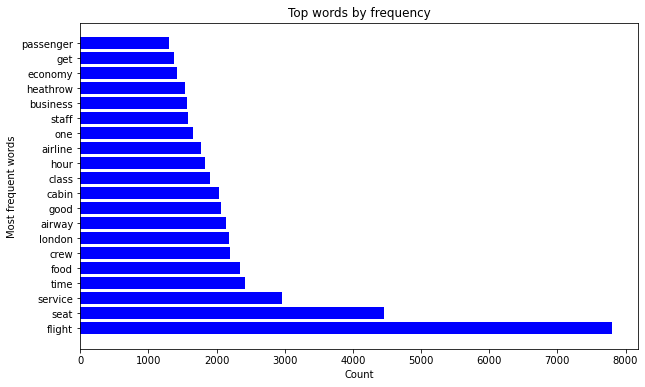

In [83]:
#Bar chart for frequently used words
common_words = word_freq(df['lem_reviews'],20)

plt.figure(figsize = (10,6))
plt.barh(common_words['words'],common_words['count'], color = 'blue')
plt.xlabel('Count')
plt.ylabel('Most frequent words')
plt.title('Top words by frequency')
plt.show()

In [21]:
# Wordcloud 
!pip install wordcloud

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


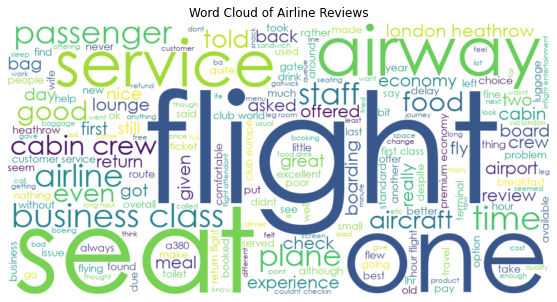

In [86]:
from wordcloud import WordCloud
from PIL import Image

text = ' '.join(review for review in df['lem_reviews'])

font_path = r'C:\Users\prash\Downloads\CenturyGothic.ttf'

wordcloud = WordCloud(width=900, height=450, background_color='white',font_path=font_path).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Airline Reviews')
plt.show()

In [87]:
#Sentiment analysis using Textblob

from textblob import TextBlob

# Calculate sentiment scores
df['sentiment'] = df['lem_reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [88]:
# Categorize sentiment into positive, negative, or neutral
df['sentiment_category'] = df['sentiment'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

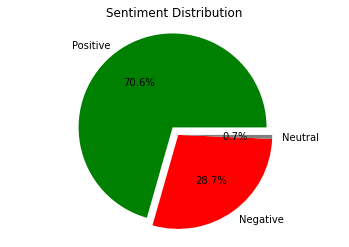

<Figure size 432x288 with 0 Axes>

In [161]:
#Now we will create some visualizations to better understand the sentiments
import matplotlib.pyplot as plt
sentiment_counts = df['sentiment_category'].value_counts()

labels = sentiment_counts.keys()
sizes = sentiment_counts
colors = ['green', 'red', 'gray']
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,  autopct='%1.1f%%')
plt.axis('equal')
plt.title('Sentiment Distribution')
plt.show()

This gives us an idea that majority of the reviews are on the positive side. It still doesnt explain the exact sentiment

In [90]:
# Sentiment group analysis
def sentiment_clean_text(text):
    if '|' in text:
        text =  text.split('|')[1]   

    text = text.lower()
        
    text = text.translate(str.maketrans('','',string.punctuation))
    
    return text

def emotion_clean_text(text):
   
    text = word_tokenize(text,"english")
    
   
    stop_words = stopwords.words('english')

   
    text_list = []
    
    for word in text:
        if word not in stop_words:
            text_list.append(word)

       
   
    return text_list

In [91]:
df.tail()

,Unnamed: 0,reviews,t_reviews,reviews_cleaned,lem_reviews,sentiment,sentiment_category
3694,3694,flew return in cw from lhr to bkk in august 20...,"[flew, return, in, cw, from, lhr, to, bkk, in,...","[flew, return, cw, lhr, bkk, august, 2012, pos...",flew return cw lhr bkk august 2012 positive fl...,0.097168,Positive
3695,3695,lhr to ham purser addresses all club passenger...,"[lhr, to, ham, purser, addresses, all, club, p...","[lhr, ham, purser, addresses, club, passengers...",lhr ham purser address club passenger name boa...,0.173214,Positive
3696,3696,my son who had worked for british airways urge...,"[my, son, who, had, worked, for, british, airw...","[son, worked, airways, urged, fly, airways, ka...",son worked airway urged fly airway kansa city ...,0.129762,Positive
3697,3697,london citynew york jfk via shannon on a318 bu...,"[london, citynew, york, jfk, via, shannon, on,...","[london, citynew, york, jfk, via, shannon, a31...",london citynew york jfk via shannon a318 reall...,0.340000,Positive
3698,3698,sinlhr ba12 b747436 first class old aircraft 1...,"[sinlhr, ba12, b747436, first, class, old, air...","[sinlhr, ba12, b747436, first, class, old, air...",sinlhr ba12 b747436 first class old aircraft 1...,-0.003423,Negative


In [92]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment_analyze(text):
    
    scores = SentimentIntensityAnalyzer().polarity_scores(text) # return dictionary of scores
    
    if (scores['neg'] > scores['pos']):
        
        return 0
    
    else:
        return 1
     

In [93]:
def read_emotion_file(file_path):
    emotion_dict = {}
    with open(file_path, 'r', encoding='utf-8') as emotion_file:
        for line in emotion_file:
            word, emotion = map(str.strip, line.split(':'))
            emotion_dict[word] = emotion
    return emotion_dict

file_path = 'C:/Users/prash/Desktop/emotions.txt'
emotion_dictionary = read_emotion_file(file_path)


In [94]:
import string
# defining the required data structures
cleaned_text = ""
score = 0
words_score_dict = {}
moods_list = []
airline_main_categories = ['service','flight','seat','crew','time','food','good','class','cabin','seats','staff','business']
# create lists for each category 
temp_category_list = []
temp_emotion_list = []

# loop for all reviews   
for i in range(len(df)):
    
    # get the review of index i
    text = str(df['reviews'][i])
    
       # run cleaning code
    cleaned_text= sentiment_clean_text(text)
    
   # apply vader
    score = sentiment_analyze(cleaned_text)
    moods_list.append(score)

    
    # cleaning for emotions
    cleaned_text_list = emotion_clean_text(cleaned_text)
    df['reviews'][i] = cleaned_text_list
    
     # emotion list builder
    for word in emotion_dictionary.keys():
        if word in cleaned_text_list:
            temp_emotion_list.append(emotion_dictionary[word])   
    
    # category list builder
    for cat in airline_main_categories:
        if cat in cleaned_text_list:
            temp_category_list.append(cat)  


df['mood'] = moods_list

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = cleaned_text_list
C:\Users\prash\AppData\Local\Temp/ipykernel_31836/3408023795.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews'][i] = clea

In [95]:
emotions_dict = dict(Counter(temp_emotion_list))

Text(0, 0.5, 'Frequency')

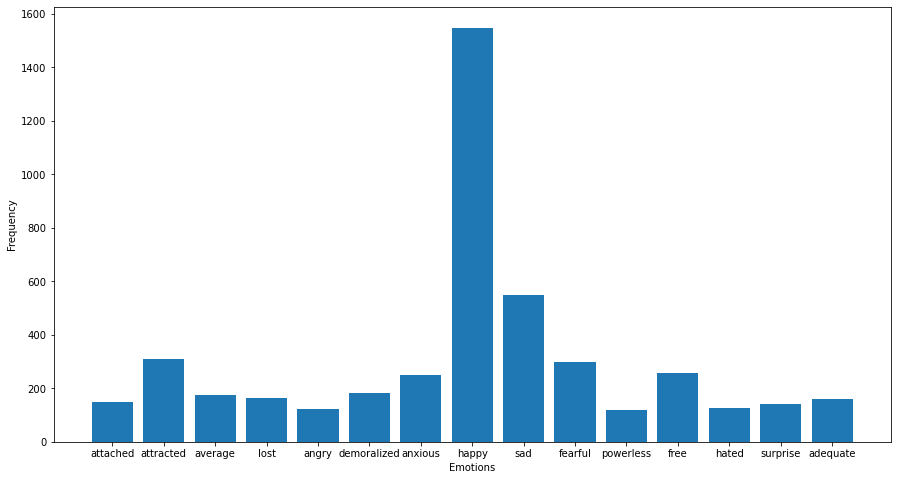

In [168]:
# emotions with freq >100
emotions_100 = dict( (key, value) for (key, value) in emotions_dict.items() if value > 100)

fig, ax = plt.subplots()
# ax.bar(words_score_dict.keys(), words_score_dict.values()) 
ax.bar(emotions_100.keys(), emotions_100.values())

# change the dimensions of the plot 
fig.set_figwidth(15)
fig.set_figheight(8)
plt.xlabel('Emotions')
plt.ylabel('Frequency')

(-0.5, 899.5, 499.5, -0.5)

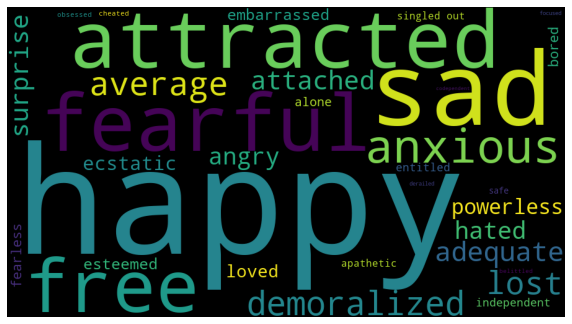

In [169]:
#Wordcloud

from wordcloud import WordCloud 

wordcloud = WordCloud(background_color='black', width=900, height=500).generate_from_frequencies(emotions_dict) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud) 
plt.axis('off') 

In [100]:
cat_dict = dict(Counter(temp_category_list))

Text(0, 0.5, 'Frequency')

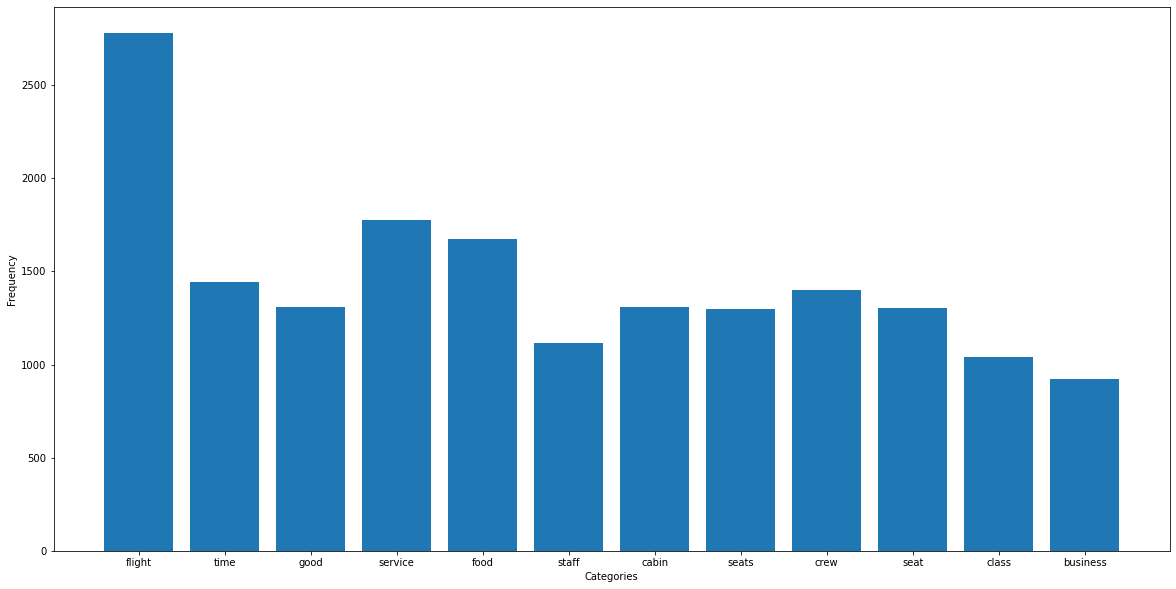

In [101]:
# categories with freq 
#emotions_20 = dict( (key, value) for (key, value) in cat_dict.items() value > 20)

fig, ax = plt.subplots()
# ax.bar(words_score_dict.keys(), words_score_dict.values()) 
ax.bar(cat_dict.keys(), cat_dict.values())

# change the dimensions of the plot 
fig.set_figwidth(20)
fig.set_figheight(10)
plt.xlabel('Categories')
plt.ylabel('Frequency')


(-0.5, 899.5, 499.5, -0.5)

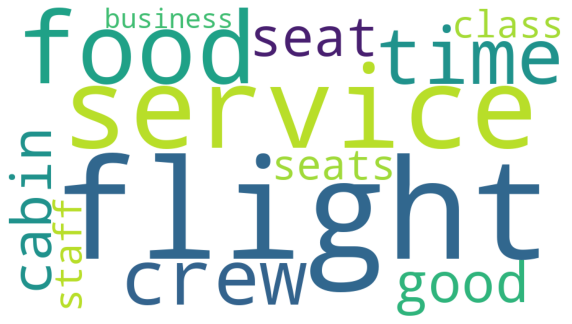

In [102]:
# Wordcloud of frequently brought up categories in the reviews

wordcloud = WordCloud(background_color='white', width=900, height=500).generate_from_frequencies(cat_dict) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud) 
plt.axis('off') 

In [49]:
# Topic Modelling using Latent Dirichlet analysis(LDA)

!pip install gensim

   ---------------------------------------- 24.0/24.0 MB 652.7 kB/s eta 0:00:00
   ---------------------------------------- 57.0/57.0 kB 755.0 kB/s eta 0:00:00


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [103]:
from gensim import corpora
from gensim.models import LdaModel

In [104]:
review_list = df['reviews_cleaned'].tolist()

In [105]:
dictionary = corpora.Dictionary(review_list)
corpus = [dictionary.doc2bow(doc) for doc in review_list]

In [151]:
#Train the LDA model

num_topics = 5
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20)

In [152]:
#Printing topic and their top words

topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.010*"meal" + 0.008*"chicken" + 0.006*"tea" + 0.006*"pasta" + 0.005*"bread"')
(1, '0.004*"europe" + 0.004*"drink" + 0.004*"lounge" + 0.003*"club" + 0.003*"sandwich"')
(2, '0.030*"flight" + 0.009*"airways" + 0.008*"london" + 0.008*"told" + 0.008*"hours"')
(3, '0.016*"class" + 0.014*"business" + 0.014*"seat" + 0.013*"seats" + 0.012*"flight"')
(4, '0.022*"flight" + 0.014*"good" + 0.013*"crew" + 0.011*"food" + 0.010*"cabin"')


In [153]:
topic_assignments = [lda_model[doc] for doc in corpus]

In [154]:
#!pip install pyLDAvis

In [155]:
import pyLDAvis.gensim_models
import pyLDAvis
import pyLDAvis.gensim

In [156]:
#pip install --upgrade scikit-learn

In [157]:
#pip install --upgrade pyLDAvis

In [158]:
vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

In [159]:
pyLDAvis.save_html(vis_data, 'lda_visualisation.html')